In [106]:
import sys
print(sys.version)

3.12.7 (main, Nov 24 2024, 05:42:37) [Clang 14.0.0 (clang-1400.0.29.202)]


In [107]:
!jupyter notebook --version

7.0.6


In [108]:
pip install pydy


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.8_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [136]:
pip install cython 


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.8_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [110]:
import numpy as np

# 1. Pydy.system 

In [111]:
# The System class manages the simulation (integration) of a system whose equations are given by KanesMethod.
# The simplest usage of this class is as follows. First, we need a KanesMethod object on which we have already invoked kanes_equations():
# km = KanesMethod(...)
# km.kanes_equations(force_list, body_list)
# times = np.linspace(0, 5, 100)
# sys = System(km, initial_conditions={dynamicsymbol('q1'): 0.5}, times=times)
# sys.constants = {symbol('m'): 5.0}
# sys.integrate()

In [112]:
# this is an example using kanes_equations: 
from sympy.physics.mechanics import KanesMethod
from sympy import symbols
from pydy.system import System
import sympy.physics.mechanics as me

mass, stiffness, damping, gravity = symbols('m, k, c, g')

position, speed = me.dynamicsymbols('x v')
positiond = me.dynamicsymbols('x', 1)
force = me.dynamicsymbols('F')

ceiling = me.ReferenceFrame('N')

origin = me.Point('origin')
origin.set_vel(ceiling, 0)

center = origin.locatenew('center', position * ceiling.x)
center.set_vel(ceiling, speed * ceiling.x)

block = me.Particle('block', center, mass)

kinematic_equations = [speed - positiond]

force_magnitude = mass * gravity - stiffness * position - damping * speed + force
forces = [(center, force_magnitude * ceiling.x)]

particles = [block]

# Kanes method
kane = me.KanesMethod(ceiling, q_ind=[position], u_ind=[speed],
                      kd_eqs=kinematic_equations)
kane.kanes_equations(particles, loads=forces)

(Matrix([[-c*v(t) + g*m - k*x(t) + F(t)]]), Matrix([[-m*Derivative(v(t), t)]]))

In [113]:
times = np.linspace(0, 5, 100) # 100 time steps from t=0 to t=5 seconds
# Using pydy.system.System(eom_method, constants=None, specifieds=None, ode_solver=None, initial_conditions=None, times=None), please refer to
# https://pydy.readthedocs.io/en/stable/system.html

# Here, the eom_method is defined in the previous cell, known as "kane", all the other parameters are none 
# y0 = position, y1 = velocity, each row represents a time stamp
sys = System(kane, times=times)
y = sys.integrate()
y

array([[ 0.        ,  0.        ],
       [ 0.00125392,  0.04922994],
       [ 0.00492985,  0.09591283],
       [ 0.01089936,  0.14005802],
       [ 0.01903466,  0.18168072],
       [ 0.02920884,  0.22080163],
       [ 0.04129617,  0.25744671],
       [ 0.05517238,  0.29164674],
       [ 0.07071486,  0.3234371 ],
       [ 0.08780289,  0.3528574 ],
       [ 0.10631785,  0.37995121],
       [ 0.12614342,  0.40476573],
       [ 0.14716575,  0.4273515 ],
       [ 0.16927361,  0.44776213],
       [ 0.19235857,  0.46605399],
       [ 0.21631509,  0.48228593],
       [ 0.24104067,  0.49651904],
       [ 0.26643595,  0.50881636],
       [ 0.29240477,  0.51924267],
       [ 0.31885432,  0.52786417],
       [ 0.34569514,  0.53474831],
       [ 0.37284121,  0.53996355],
       [ 0.40020998,  0.5435791 ],
       [ 0.42772243,  0.54566476],
       [ 0.45530306,  0.54629069],
       [ 0.48287992,  0.54552723],
       [ 0.51038462,  0.5434447 ],
       [ 0.5377523 ,  0.54011326],
       [ 0.56492166,

In [114]:
# To double-check the constants, specifieds, states and times in your problem, look at these properties:
sys.constants_symbols
sys.specifieds_symbols
sys.states
sys.times

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

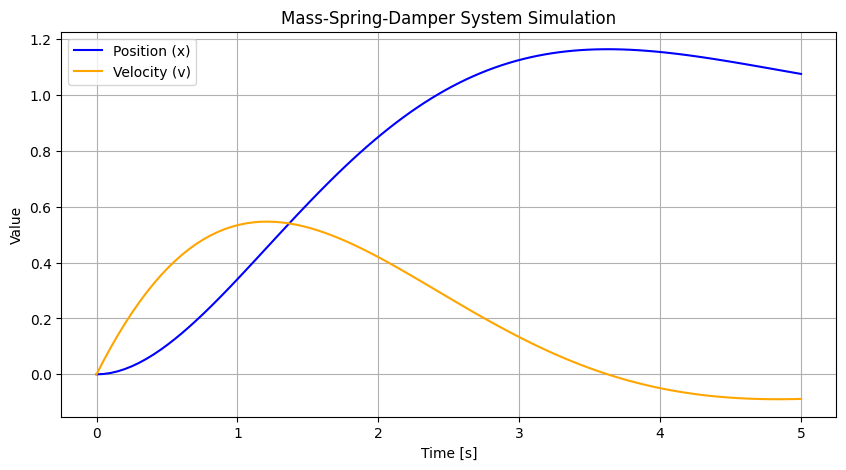

In [115]:
import matplotlib.pyplot as plt
# Extract position and velocity
position = y[:, 0]  # x(t)
velocity = y[:, 1]  # v(t)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(times, position, label='Position (x)', color='blue')
plt.plot(times, velocity, label='Velocity (v)', color='orange')

# Label the plot
plt.xlabel('Time [s]')
plt.ylabel('Value')
plt.title('Mass-Spring-Damper System Simulation')
plt.legend()
plt.grid(True)
plt.show()


# 2. Pydy.models

In [116]:
# The pydy.models file provides canned symbolic models of classical dynamic systems that are mostly for testing and example purposes. There are currently two models:

# multi_mass_spring_damper():
# A one dimensional series of masses connected by linear dampers and springs that can optionally be under the influence of gravity and an arbitrary force.

# n_link_pendulum_on_cart()
# This is an extension to the classic two dimensional inverted pendulum on a cart to multiple links. You can optionally apply an arbitrary lateral force to the cart and/or apply arbitrary torques between each link.

# Example:

from pydy.models import multi_mass_spring_damper
sys = multi_mass_spring_damper()
sys.constants_symbols

{c0, k0, m0}

In [117]:
sys.coordinates

[x0(t)]

In [118]:
sys.speeds

[v0(t)]

In [119]:
sys.eom_method.rhs()

Matrix([
[                    v0(t)],
[(-c0*v0(t) - k0*x0(t))/m0]])

In [120]:
# A two degree of freedom mass spring damper system under the influence of gravity and two external forces can be created with:
sys = multi_mass_spring_damper(2, True, True)
sys.constants_symbols

{c0, c1, g, k0, k1, m0, m1}

In [121]:
sys.coordinates

[x0(t), x1(t)]

In [122]:
sys.speeds

[v0(t), v1(t)]

In [123]:
sys.specifieds_symbols

{f0(t), f1(t)}

In [124]:
import sympy as sm

In [125]:
sm.simplify(sys.eom_method.rhs())

Matrix([
[                                                                                                              v0(t)],
[                                                                                                              v1(t)],
[                                                     (-c0*v0(t) + c1*v1(t) + g*m0 - k0*x0(t) + k1*x1(t) + f0(t))/m0],
[-(m1*(-c0*v0(t) + g*m0 + g*m1 - k0*x0(t) + f0(t) + f1(t)) + (m0 + m1)*(c1*v1(t) - g*m1 + k1*x1(t) - f1(t)))/(m0*m1)]])

## API

In [126]:
# This module contains some sample symbolic models used for testing and examples.
import pydy
# Returns a system containing the symbolic equations of motion and associated variables for a simple mutli-degree of freedom point mass, spring, damper system with optional gravitational and external specified forces

pydy.models.multi_mass_spring_damper(n=1, apply_gravity=False, apply_external_forces=False)
'''Parameters
n: integer
The number of masses in the serial chain.

apply_gravity:boolean
If true, gravity will be applied to each mass.

apply_external_forces:boolean
If true, a time varying external force will be applied to each mass.

Returns
system: pydy.system.System
A system constructed from the KanesMethod object.'''


'Parameters\nn: integer\nThe number of masses in the serial chain.\n\napply_gravity:boolean\nIf true, gravity will be applied to each mass.\n\napply_external_forces:boolean\nIf true, a time varying external force will be applied to each mass.\n\nReturns\nsystem: pydy.system.System\nA system constructed from the KanesMethod object.'

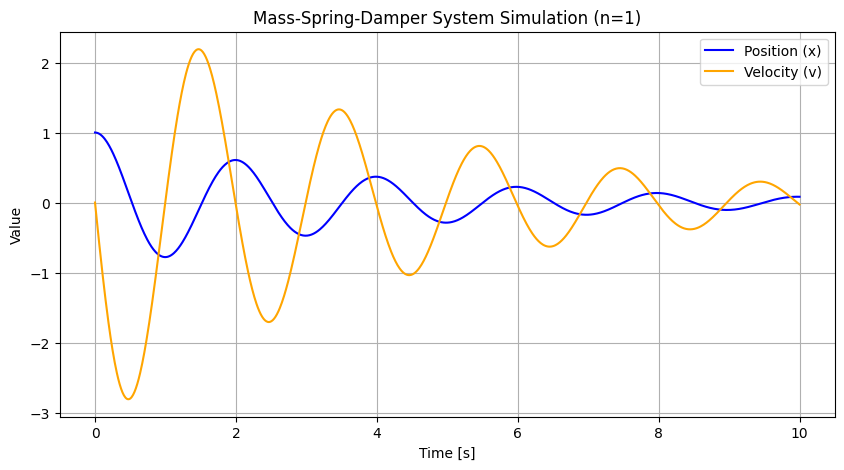

In [127]:
# example of using this model
from pydy.models import multi_mass_spring_damper
from pydy.system import System
import numpy as np
import matplotlib.pyplot as plt

# Create the symbolic model
sys = multi_mass_spring_damper(n=1, apply_gravity=False, apply_external_forces=False)

# Set numerical parameters
sym_dict = {str(s): s for s in sys.constants_symbols}
sys.constants = {
    sym_dict['m0']: 1.0,
    sym_dict['k0']: 10.0,
    sym_dict['c0']: 0.5
}

# Initial conditions
sys.initial_conditions = {
    sys.coordinates[0]: 1.0,  # Initial displacement
    sys.speeds[0]: 0.0        # Initial velocity
}

# Set the time vector for the simulation
sys.times = np.linspace(0, 10, 1000)

# Run the simulation
x = sys.integrate()

# x is a NumPy array of shape (1000, 2) for 1 mass
# x[:, 0] = position, x[:, 1] = velocity

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(sys.times, x[:, 0], label='Position (x)', color='blue')
plt.plot(sys.times, x[:, 1], label='Velocity (v)', color='orange')
plt.xlabel('Time [s]')
plt.ylabel('Value')
plt.title('Mass-Spring-Damper System Simulation (n=1)')
plt.legend()
plt.grid(True)
plt.show()



# 3. Pydy.codegen

In [128]:
# The pydy.codegen package contains various tools to generate numerical code from symbolic descriptions of the equations of motion of systems. It allows you to generate code using a variety of backends depending on your needs. The generated code can also be auto-wrapped for immediate use in a Python session or script. Each component of the code generators and wrappers are accessible so that you can use just the raw code or the wrapper versions.

# We currently support three backends:

'''lambdify
This generates NumPy-aware Python code which is defined in a Python lambda function, using the sympy.utilities.lambdify module and is the default generator.

Theano
This generates Theano trees that are compiled into low level code, using the sympy.printers.theano_code module.

Cython
This generates C code that can be called from Python, using SymPy’s C code printer utilities and Cython.'''

'lambdify\nThis generates NumPy-aware Python code which is defined in a Python lambda function, using the sympy.utilities.lambdify module and is the default generator.\n\nTheano\nThis generates Theano trees that are compiled into low level code, using the sympy.printers.theano_code module.\n\nCython\nThis generates C code that can be called from Python, using SymPy’s C code printer utilities and Cython.'

## sys.generate_ode_function()

In [129]:
# The simplest entry point to the code generation tools is through the System class for generagting ode function: 
from pydy.models import multi_mass_spring_damper
sys = multi_mass_spring_damper()
rhs = sys.generate_ode_function()
import numpy as np
rhs(np.array([1.0, 2.0]), 0.0, np.array([1.0, 2.0, 3.0]))

array([ 2., -8.])

## from pydy.codegen.ode_function_generators import generate_ode_function

In [130]:
#You can also use the functional interface to the code generation/wrapper classes:
from numpy import array
from pydy.models import multi_mass_spring_damper
# codegen 
from pydy.codegen.ode_function_generators import generate_ode_function
sys = multi_mass_spring_damper()
sym_rhs = sys.eom_method.rhs()
q = sys.coordinates
u = sys.speeds
p = sys.constants_symbols
rhs = generate_ode_function(sym_rhs, q, u, p)
rhs(array([1.0, 2.0]), 0.0, array([1.0, 2.0, 3.0]))

array([ 2., -8.])

## LambdifyODEFunctionGenerator

In [144]:
# The backends are implemented as subclasses of ODEFunctionGenerator. You can make use of the ODEFunctionGenerator classes directly:
from pydy.codegen.ode_function_generators import LambdifyODEFunctionGenerator
g = LambdifyODEFunctionGenerator(sym_rhs, q, u, p)
rhs = g.generate()
rhs(array([1.0, 2.0]), 0.0, array([1.0, 2.0, 3.0]))


array([ 2., -8.])

## CythonMatrixGenerator

In [145]:
# Furthermore, for direct control over evaluating matrices you can use the lamdify and theano_functions in SymPy or utilize the CythonMatrixGenerator class in PyDy. 
# For example, this shows you how to generate C and Cython code to evaluate matrices:
from pydy.codegen.cython_code import CythonMatrixGenerator
sys = multi_mass_spring_damper()
q = sys.coordinates
u = sys.speeds
p = sys.constants_symbols
sym_rhs = sys.eom_method.rhs()
g = CythonMatrixGenerator([q, u, p], [sym_rhs])
setup_py, cython_src, c_header, c_src = g.doprint()
print(setup_py)

#!/usr/bin/env python

from setuptools import setup
from setuptools import Extension

from Cython.Build import cythonize
import numpy

extension = Extension(name="pydy_codegen",
                      sources=["pydy_codegen.pyx",
                               "pydy_codegen_c.c"],
                      include_dirs=[numpy.get_include()])

setup(name="pydy_codegen",
      ext_modules=cythonize([extension]))


In [146]:
print(cython_src)

import numpy as np
cimport numpy as np
cimport cython

cdef extern from "pydy_codegen_c.h":
    void evaluate(
                  double* input_0,
                  double* input_1,
                  double* input_2,
                  double* output_0
                 )

@cython.boundscheck(False)
@cython.wraparound(False)
def eval(
         np.ndarray[np.double_t, ndim=1, mode='c'] input_0,
         np.ndarray[np.double_t, ndim=1, mode='c'] input_1,
         np.ndarray[np.double_t, ndim=1, mode='c'] input_2,
         np.ndarray[np.double_t, ndim=1, mode='c'] output_0
        ):

    evaluate(
             <double*> input_0.data,
             <double*> input_1.data,
             <double*> input_2.data,
             <double*> output_0.data
            )

    return (
            output_0
           )


In [147]:
print(c_src)

#include <math.h>
#include "pydy_codegen_c.h"

void evaluate(
              double input_0[1],
              double input_1[1],
              double input_2[3],
              double output_0[2]
             )
{

    double pydy_0 = input_1[0];

    output_0[0] = pydy_0;
    output_0[1] = (-input_2[2] * pydy_0 - input_2[1] * input_0[0])/input_2[0];

}


In [148]:
print(c_header)

void evaluate(
              double input_0[1],
              double input_1[1],
              double input_2[3],
              double output_0[2]
             );
/*

input_0[1] : [x0(t)]
input_1[1] : [v0(t)]
input_2[3] : [m0, k0, c0]

*/


In [149]:
rhs = g.compile()
res = array([0.0, 0.0])
rhs(array([1.0]), array([2.0]), array([1.0, 2.0, 3.0]), res)

array([ 2., -8.])

## generating Octave/Matlab code

In [150]:
# We also support generating Octave/Matlab code as shown below:
from pydy.codegen.octave_code import OctaveMatrixGenerator
sys = multi_mass_spring_damper()
q = sys.coordinates
u = sys.speeds
p = sys.constants_symbols
sym_rhs = sys.eom_method.rhs()
g = OctaveMatrixGenerator([q + u, p], [sym_rhs])
m_src = g.doprint()
print(m_src)

function [output_1] = eval_mats(input_1, input_2)
% function [output_1] = eval_mats(input_1, input_2)
%
% input_1 : [x0(t), v0(t)]
% input_2 : [m0, k0, c0]

    pydy_0 = input_1(2);

    output_1 = [pydy_0; (-input_2(3).*pydy_0 - ...
    input_2(2).*input_1(1))./input_2(1)];

end



## API
# https://pydy.readthedocs.io/en/stable/codegen.html

In [ ]:
#This module contains source code dedicated to generating C code from matrices generated from sympy.physics.mechanics.

In [ ]:
# classpydy.codegen.c_code.CMatrixGenerator(arguments, matrices, cse=True)
# This class generates C source files that simultaneously numerically evaluate any number of SymPy matrices.
'''
doprint(prefix=None)[source]¶
    Returns a string each for the header and the source files.
        Parameters
        prefixstring, optional
        A prefix for the name of the header file. This will cause an include statement to to be added to the source.

write(prefix, path=None)[source]¶
    Writes a header and source file to disk.
        Parameters
        prefixstring
        Two files will be generated: <prefix>.c and <prefix>.h.
    '''

In [ ]:
# classpydy.codegen.cython_code.CythonMatrixGenerator(arguments, matrices, prefix='pydy_codegen', cse=True)[source]¶
# This class generates the Cython code for evaluating a sequence of matrices. It can compile the code and return a Python function.
'''
__init__(arguments, matrices, prefix='pydy_codegen', cse=True)[source]¶
    Parameters
        argumentssequences of sequences of SymPy Symbol or Function.
        Each of the sequences will be converted to input arrays in the Cython function. All of the symbols/functions contained in matrices need to be in the sequences, but the sequences can also contain extra symbols/functions that are not contained in the matrices.

        matrices:sequence of SymPy.Matrix
        A sequence of the matrices that should be evaluated in the function. The expressions should contain only sympy.Symbol or sympy.Function that are functions of me.dynamicsymbols._t.
        
        prefixs:tring, optional
        The desired prefix for the generated files.
        
        cse:boolean
        Find and replace common sub-expressions in matrices if True.

compile(tmp_dir=None, verbose=False)[source]¶
    Returns a function which evaluates the matrices.

    Parameters
        tmp_dir:string
        The path to an existing or non-existing directory where all of the generated files will be stored.

        verbose:boolean
        If true the output of the completed compilation steps will be printed.

doprint()[source]¶
    Returns the text of the four source files needed to compile Cython wrapper that evaluates the provided SymPy matrices.

    Returns
        setup_py:string
        The text of the setup.py file used to compile the Cython extension.
        
        cython_source:string
        The text of the Cython pyx file which includes the wrapper function eval.
        
        c_header:string
        The text of the C header file that exposes the evaluate function.
        
        c_source:string
        The text of the C source file containing the function that evaluates the matrices.
        
write(path=None)[source]¶
    Writes the four source files needed to compile the Cython function to the current working directory.

    Parameters
    path:string
    The absolute or relative path to an existing directory to place the files instead of the cwd.

'''

In [ ]:
# classpydy.codegen.matrix_generator.MatrixGenerator(arguments, matrices, cse=True)[source]¶
# This abstract base class generates source files that simultaneously numerically evaluate any number of SymPy matrices.
'''
__init__(arguments, matrices, cse=True)[source]¶
    Parameters
        argumentssequence of sequences of SymPy Symbol or Function
        Each of the sequences will be converted to input arrays in the generated function. All of the symbols/functions contained in matrices need to be in the sequences, but the sequences can also contain extra symbols/functions that are not contained in the matrices.

        matrices:sequence of SymPy.Matrix
        A sequence of the matrices that should be evaluated in the function. The expressions should contain only sympy.Symbol or sympy.Function that are functions of me.dynamicsymbols._t.
        
        cse:boolean
        Find and replace common sub-expressions in matrices if True.

comma_lists()[source]¶
    Returns a string output for each of the sequences of SymPy arguments.
'''

In [ ]:
#classpydy.codegen.octave_code.OctaveMatrixGenerator(arguments, matrices, cse=True)[source]¶
# This class generates Octave/Matlab source files that simultaneously numerically evaluate any number of SymPy matrices.
'''
doprint(prefix='eval_mats')[source]¶
    Returns a string that implements the function.

    Parameters
        prefix:string, optional
        The name of the Octave/Matlab function.

write(prefix='eval_mats', path=None)[source]¶
    Writes the <prefix>.m file to disc at the give path location'''


In [ ]:
# classpydy.codegen.ode_function_generators.CythonODEFunctionGenerator(*args, **kwargs)[source]¶
'''
__init__(*args, **kwargs)[source]¶
Generates a numerical function which can evaluate the right hand side of the first order ordinary differential equations from a system described by one of the following three symbolic forms:

[1] x’ = F(x, t, r, p)

[2] M(x, p) x’ = F(x, t, r, p)

[3] M(q, p) u’ = F(q, u, t, r, p)
q’ = G(q, u, t, r, p)

where

x : states, i.e. [q, u] t : time r : specified (exogenous) inputs p : constants q : generalized coordinates u : generalized speeds M : mass matrix (full or minimum) F : right hand side (full or minimum) G : right hand side of the kinematical differential equations

The generated function is of the form F(x, t, p) or F(x, t, r, p) depending on whether the system has specified inputs or not.

Parameters

right_hand_side:SymPy Matrix, shape(n, 1)
    A column vector containing the symbolic expressions for the right hand side of the ordinary differential equations. 
    If the right hand side has been solved for symbolically then only F is required, see form [1]; 
    if not then the mass matrix must also be supplied, see forms [2, 3].

coordinates:sequence of SymPy Functions
    The generalized coordinates. These must be ordered in the same order as the rows in M, F, and/or G and be functions of time.

speeds:sequence of SymPy Functions
    The generalized speeds. These must be ordered in the same order as the rows in M, F, and/or G and be functions of time.

constants:sequence of SymPy Symbols, optional
    All of the constants present in the equations of motion. The order does not matter.

mass_matrix:sympy.Matrix, shape(n, n), optional
    This can be either the “full” mass matrix as in [2] or the “minimal” mass matrix as in [3].
    The rows and columns must be ordered to match the order of the coordinates and speeds. 
    In the case of the full mass matrix, the speeds should always be ordered before the speeds, i.e. x = [q, u].

coordinate_derivatives:sympy.Matrix, shape(m, 1), optional
    If the “minimal” mass matrix, form [3], is supplied, then this column vector represents the right hand side of the kinematical differential equations.

specifieds:sequence of SymPy Functions
    The specified exogenous inputs to the system. These should be functions of time and the order does not matter.

linear_sys_solver:string or function
    Specify either numpy or scipy to use the linear solvers provided in each package or supply a function that solves a linear system Ax=b with the call signature x = solve(A, b). For example, if you need to use custom kwargs for the SciPy solver, pass in a lambda function that wraps the solver and sets them.

constants_arg_type:string
    The generated function accepts two different types of arguments for the numerical values of the constants: either a ndarray of the constants values in the correct order or a dictionary mapping the constants symbols to the numerical values. If None, this is determined inside of the generated function and can cause a significant slow down for performance critical code. If you know apriori what arg types you need to support choose either array or dictionary. Note that array is faster than dictionary.

specifieds_arg_type:string
    The generated function accepts three different types of arguments for the numerical values of the specifieds: either a ndarray of the specifieds values in the correct order, a function that generates the correctly ordered ndarray, or a dictionary mapping the specifieds symbols or tuples of thereof to floats, ndarrays, or functions. If None, this is determined inside of the generated function and can cause a significant slow down for performance critical code. If you know apriori what arg types you want to support choose either array, function, or dictionary. The speed of each, from fast to slow, are array, function, dictionary, None.
'''

In [ ]:
# classpydy.codegen.ode_function_generators.LambdifyODEFunctionGenerator(*args, **kwargs)[source]¶
'''
__init__(*args, **kwargs)[source]¶
Generates a numerical function which can evaluate the right hand side of the first order ordinary differential equations from a system described by one of the following three symbolic forms:

[1] x’ = F(x, t, r, p)

[2] M(x, p) x’ = F(x, t, r, p)

[3] M(q, p) u’ = F(q, u, t, r, p)
q’ = G(q, u, t, r, p)

where

x : states, i.e. [q, u] t : time r : specified (exogenous) inputs p : constants q : generalized coordinates u : generalized speeds M : mass matrix (full or minimum) F : right hand side (full or minimum) G : right hand side of the kinematical differential equations

The generated function is of the form F(x, t, p) or F(x, t, r, p) depending on whether the system has specified inputs or not.

Parameters
right_hand_side:SymPy Matrix, shape(n, 1)
A column vector containing the symbolic expressions for the right hand side of the ordinary differential equations. If the right hand side has been solved for symbolically then only F is required, see form [1]; if not then the mass matrix must also be supplied, see forms [2, 3].

coordinates:sequence of SymPy Functions
The generalized coordinates. These must be ordered in the same order as the rows in M, F, and/or G and be functions of time.

speeds:sequence of SymPy Functions
The generalized speeds. These must be ordered in the same order as the rows in M, F, and/or G and be functions of time.

constants:sequence of SymPy Symbols, optional
All of the constants present in the equations of motion. The order does not matter.

mass_matrix:sympy.Matrix, shape(n, n), optional
This can be either the “full” mass matrix as in [2] or the “minimal” mass matrix as in [3]. The rows and columns must be ordered to match the order of the coordinates and speeds. In the case of the full mass matrix, the speeds should always be ordered before the speeds, i.e. x = [q, u].

coordinate_derivatives:sympy.Matrix, shape(m, 1), optional
If the “minimal” mass matrix, form [3], is supplied, then this column vector represents the right hand side of the kinematical differential equations.

specifieds:sequence of SymPy Functions
The specified exogenous inputs to the system. These should be functions of time and the order does not matter.

linear_sys_solver:string or function
Specify either numpy or scipy to use the linear solvers provided in each package or supply a function that solves a linear system Ax=b with the call signature x = solve(A, b). For example, if you need to use custom kwargs for the SciPy solver, pass in a lambda function that wraps the solver and sets them.

constants_arg_type:string
The generated function accepts two different types of arguments for the numerical values of the constants: either a ndarray of the constants values in the correct order or a dictionary mapping the constants symbols to the numerical values. If None, this is determined inside of the generated function and can cause a significant slow down for performance critical code. If you know apriori what arg types you need to support choose either array or dictionary. Note that array is faster than dictionary.

specifieds_arg_type:string
The generated function accepts three different types of arguments for the numerical values of the specifieds: either a ndarray of the specifieds values in the correct order, a function that generates the correctly ordered ndarray, or a dictionary mapping the specifieds symbols or tuples of thereof to floats, ndarrays, or functions. If None, this is determined inside of the generated function and can cause a significant slow down for performance critical code. If you know apriori what arg types you want to support choose either array, function, or dictionary. The speed of each, from fast to slow, are array, function, dictionary, None.
'''

In [ ]:
# classpydy.codegen.ode_function_generators.ODEFunctionGenerator(right_hand_side, coordinates, speeds, constants=(), mass_matrix=None, coordinate_derivatives=None,specifieds=None, linear_sys_solver='numpy', constants_arg_type=None, specifieds_arg_type=None)[source]¶
# This is an abstract base class for all of the generators. A subclass is expected to implement the methods necessary to evaluate the arrays needed to compute xdot for the three different system specification types.
'''__init__(right_hand_side, coordinates, speeds, constants=(), mass_matrix=None, coordinate_derivatives=None, specifieds=None, linear_sys_solver='numpy', constants_arg_type=None, specifieds_arg_type=None)[source]¶
Generates a numerical function which can evaluate the right hand side of the first order ordinary differential equations from a system described by one of the following three symbolic forms:

[1] x’ = F(x, t, r, p)

[2] M(x, p) x’ = F(x, t, r, p)

[3] M(q, p) u’ = F(q, u, t, r, p)
q’ = G(q, u, t, r, p)

where

x : states, i.e. [q, u] t : time r : specified (exogenous) inputs p : constants q : generalized coordinates u : generalized speeds M : mass matrix (full or minimum) F : right hand side (full or minimum) G : right hand side of the kinematical differential equations

The generated function is of the form F(x, t, p) or F(x, t, r, p) depending on whether the system has specified inputs or not.

Parameters
right_hand_side:SymPy Matrix, shape(n, 1)
    A column vector containing the symbolic expressions for the right hand side of the ordinary differential equations. 
    If the right hand side has been solved for symbolically then only F is required, see form [1]; 
    if not then the mass matrix must also be supplied, see forms [2, 3].

coordinates:sequence of SymPy Functions
    The generalized coordinates. These must be ordered in the same order as the rows in M, F, and/or G and be functions of time.

speeds:sequence of SymPy Functions
    The generalized speeds. These must be ordered in the same order as the rows in M, F, and/or G and be functions of time.

constants:sequence of SymPy Symbols, optional
    All of the constants present in the equations of motion. The order does not matter.

mass_matrix:sympy.Matrix, shape(n, n), optional
    This can be either the “full” mass matrix as in [2] or the “minimal” mass matrix as in [3]. 
    The rows and columns must be ordered to match the order of the coordinates and speeds. 
    In the case of the full mass matrix, the speeds should always be ordered before the speeds, i.e. x = [q, u].

coordinate_derivatives:sympy.Matrix, shape(m, 1), optional
    If the “minimal” mass matrix, form [3], is supplied, then this column vector represents the right hand side of the kinematical differential equations.

specifieds:sequence of SymPy Functions
    The specified exogenous inputs to the system. These should be functions of time and the order does not matter.

linear_sys_solver:string or function
    Specify either numpy or scipy to use the linear solvers provided in each package or supply a function that solves a linear system Ax=b with the call signature x = solve(A, b). 
    For example, if you need to use custom kwargs for the SciPy solver, pass in a lambda function that wraps the solver and sets them.

constants_arg_type:string
    The generated function accepts two different types of arguments for the numerical values of the constants: 
    either a ndarray of the constants values in the correct order or a dictionary mapping the constants symbols to the numerical values. 
    If None, this is determined inside of the generated function and can cause a significant slow down for performance critical code. 
    If you know apriori what arg types you need to support choose either array or dictionary. Note that array is faster than dictionary.

specifieds_arg_type:string
    The generated function accepts three different types of arguments for the numerical values of the specifieds: 
    either a ndarray of the specifieds values in the correct order, a function that generates the correctly ordered ndarray, 
    or a dictionary mapping the specifieds symbols or tuples of thereof to floats, ndarrays, or functions. 
    If None, this is determined inside of the generated function and can cause a significant slow down for performance critical code. 
    If you know apriori what arg types you want to support choose either array, function, or dictionary. 
    The speed of each, from fast to slow, are array, function, dictionary, None.

define_inputs()[source]¶
    Sets self.inputs to the list of sequences [q, u, p] or [q, u, r, p].

generate()[source]¶
    Returns a function that evaluates the right hand side of the first order ordinary differential equations in one of two forms:
    
    x’ = f(x, t, p)
    
    or
    
    x’ = f(x, t, r, p)
    
    See the docstring of the generated function for more details.

static list_syms(indent, syms)[source]¶
Returns a string representation of a valid rst list of the symbols in the sequence syms and indents the list given the integer number of indentations.

In [ ]:
# classpydy.codegen.ode_function_generators.TheanoODEFunctionGenerator(*args, **kwargs)[source]¶
'''
__init__(*args, **kwargs)[source]¶
Generates a numerical function which can evaluate the right hand side of the first order ordinary differential equations from a system described by one of the following three symbolic forms:

[1] x’ = F(x, t, r, p)

[2] M(x, p) x’ = F(x, t, r, p)

[3] M(q, p) u’ = F(q, u, t, r, p)
q’ = G(q, u, t, r, p)

where

x : states, i.e. [q, u] t : time r : specified (exogenous) inputs p : constants q : generalized coordinates u : generalized speeds M : mass matrix (full or minimum) F : right hand side (full or minimum) G : right hand side of the kinematical differential equations

The generated function is of the form F(x, t, p) or F(x, t, r, p) depending on whether the system has specified inputs or not.

Parameters
    right_hand_side:SymPy Matrix, shape(n, 1)
        A column vector containing the symbolic expressions for the right hand side of the ordinary differential equations. If the right hand side has been solved for symbolically then only F is required, see form [1]; if not then the mass matrix must also be supplied, see forms [2, 3].
    
    coordinates:sequence of SymPy Functions
        The generalized coordinates. These must be ordered in the same order as the rows in M, F, and/or G and be functions of time.
    
    speeds:sequence of SymPy Functions
        The generalized speeds. These must be ordered in the same order as the rows in M, F, and/or G and be functions of time.
    
    constants:sequence of SymPy Symbols, optional
        All of the constants present in the equations of motion. The order does not matter.
    
    mass_matrix:sympy.Matrix, shape(n, n), optional
        This can be either the “full” mass matrix as in [2] or the “minimal” mass matrix as in [3]. The rows and columns must be ordered to match the order of the coordinates and speeds. In the case of the full mass matrix, the speeds should always be ordered before the speeds, i.e. x = [q, u].
    
    coordinate_derivatives:sympy.Matrix, shape(m, 1), optional
        If the “minimal” mass matrix, form [3], is supplied, then this column vector represents the right hand side of the kinematical differential equations.
    
    specifieds:sequence of SymPy Functions
        The specified exogenous inputs to the system. These should be functions of time and the order does not matter.

    linear_sys_solverz:string or function
        Specify either numpy or scipy to use the linear solvers provided in each package or supply a function that solves a linear system Ax=b with the call signature x = solve(A, b). For example, if you need to use custom kwargs for the SciPy solver, pass in a lambda function that wraps the solver and sets them.
    
    constants_arg_type:string
        The generated function accepts two different types of arguments for the numerical values of the constants: either a ndarray of the constants values in the correct order or a dictionary mapping the constants symbols to the numerical values. If None, this is determined inside of the generated function and can cause a significant slow down for performance critical code. If you know apriori what arg types you need to support choose either array or dictionary. Note that array is faster than dictionary.
    
    specifieds_arg_type:string
        The generated function accepts three different types of arguments for the numerical values of the specifieds: either a ndarray of the specifieds values in the correct order, a function that generates the correctly ordered ndarray, or a dictionary mapping the specifieds symbols or tuples of thereof to floats, ndarrays, or functions. If None, this is determined inside of the generated function and can cause a significant slow down for performance critical code. If you know apriori what arg types you want to support choose either array, function, or dictionary. The speed of each, from fast to slow, are array, function, dictionary, None.

define_inputs()[source]¶
Sets self.inputs to the list of sequences [q, u, p] or [q, u, r, p].


'''

In [ ]:
# pydy.codegen.ode_function_generators.generate_ode_function(*args, **kwargs)[source]¶
# Generates a numerical function which can evaluate the right hand side of the first order ordinary differential equations from a system described by one of the following three symbolic forms:
'''
[1] x’ = F(x, t, r, p)

[2] M(x, p) x’ = F(x, t, r, p)

[3] M(q, p) u’ = F(q, u, t, r, p)
q’ = G(q, u, t, r, p)

where

x : states, i.e. [q, u] t : time r : specified (exogenous) inputs p : constants q : generalized coordinates u : generalized speeds M : mass matrix (full or minimum) F : right hand side (full or minimum) G : right hand side of the kinematical differential equations

The generated function is of the form F(x, t, p) or F(x, t, r, p) depending on whether the system has specified inputs or not.

Parameters
right_hand_sideZ:SymPy Matrix, shape(n, 1)
    A column vector containing the symbolic expressions for the right hand side of the ordinary differential equations. If the right hand side has been solved for symbolically then only F is required, see form [1]; if not then the mass matrix must also be supplied, see forms [2, 3].

coordinatesZ:sequence of SymPy Functions
    The generalized coordinates. These must be ordered in the same order as the rows in M, F, and/or G and be functions of time.

speedsZ:sequence of SymPy Functions
    The generalized speeds. These must be ordered in the same order as the rows in M, F, and/or G and be functions of time.

constantsz:sequence of SymPy Symbols, optional
    All of the constants present in the equations of motion. The order does not matter.

mass_matrixZ:sympy.Matrix, shape(n, n), optional
    This can be either the “full” mass matrix as in [2] or the “minimal” mass matrix as in [3]. The rows and columns must be ordered to match the order of the coordinates and speeds. In the case of the full mass matrix, the speeds should always be ordered before the speeds, i.e. x = [q, u].

coordinate_derivatives:sympy.Matrix, shape(m, 1), optional
    If the “minimal” mass matrix, form [3], is supplied, then this column vector represents the right hand side of the kinematical differential equations.

specifieds:sequence of SymPy Functions
    The specified exogenous inputs to the system. These should be functions of time and the order does not matter.

linear_sys_solver:string or function
    Specify either numpy or scipy to use the linear solvers provided in each package or supply a function that solves a linear system Ax=b with the call signature x = solve(A, b). For example, if you need to use custom kwargs for the SciPy solver, pass in a lambda function that wraps the solver and sets them.

constants_arg_type:string
    The generated function accepts two different types of arguments for the numerical values of the constants: either a ndarray of the constants values in the correct order or a dictionary mapping the constants symbols to the numerical values. If None, this is determined inside of the generated function and can cause a significant slow down for performance critical code. If you know apriori what arg types you need to support choose either array or dictionary. Note that array is faster than dictionary.

specifieds_arg_type:string
    The generated function accepts three different types of arguments for the numerical values of the specifieds: either a ndarray of the specifieds values in the correct order, a function that generates the correctly ordered ndarray, or a dictionary mapping the specifieds symbols or tuples of thereof to floats, ndarrays, or functions. If None, this is determined inside of the generated function and can cause a significant slow down for performance critical code. If you know apriori what arg types you want to support choose either array, function, or dictionary. The speed of each, from fast to slow, are array, function, dictionary, None.

generator : string or and ODEFunctionGenerator, optional

The method used for generating the numeric right hand side. The string options are {‘lambdify’|’theano’|’cython’} with ‘lambdify’ being the default. You can also pass in a custom subclass of ODEFunctionGenerator.

Returns
rhsfunction
A function which evaluates the derivaties of the states. See the function’s docstring for more details after generation.
'''

# Example 
## https://pydy.readthedocs.io/en/stable/examples/chaos-pendulum.html

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm
import sympy.physics.mechanics as me
from pydy.system import System
from pydy.viz import Cylinder, Plane, VisualizationFrame, Scene

In [152]:
%matplotlib inline
me.init_vprinting(use_latex='mathjax')

In [187]:
!pip install "pydy[visualization]"
!jupyter nbextension enable --py --sys-prefix pydy.viz

  Using cached pydy-0.7.1.tar.gz (6.6 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pydy: filename=pydy-0.7.1-py3-none-any.whl size=5227160 sha256=65b0bd96db7b2dbba16ceb2f1c16791012c9e08dcf2ec37a4c1aec6d67a44d30
  Stored in directory: /Users/yifanzhang/Library/Caches/pip/wheels/e6/25/87/d248ada8230596b74c734b677ec2b403bbb5dd5bffa0f1d484
Successfully built pydy
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output p

## Define Variables¶

In [153]:
'''
First define the system constants:

mA: Mass of the slender rod.

mB: Mass of the plate.

lB: Distance from N0 to B0 along the slender rod’s axis.

w: The width of the plate.

h: The height of the plate.

g: The acceleratoin due to gravity.
'''
mA, mB, lB, w, h, g = sm.symbols('m_A, m_B, L_B, w, h, g')


In [156]:
# There are two time varying generalized coordinates:

'''θ (t): The angle of the slender rod with respect to the ceiling.
φ (t): The angle of the plate with respect to the slender rod.

The two generalized speeds will then be defined as:
ω (t) = theta.diff() : The angular rate of the slender rod with respect to the ceiling.
α (t) = phi.diff() : The angluer rate of the plate with respect to the slender rod. '''
theta, phi = me.dynamicsymbols('theta, phi')
omega, alpha = me.dynamicsymbols('omega, alpha')


In [155]:
kin_diff = (omega - theta.diff(), alpha - phi.diff())
kin_diff

(ω - θ̇, α - φ̇)

## Define Orientations¶



In [157]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

In [159]:
#The frames are oriented with respect to each other by simple revolute rotations. The following lines set the orientations:

A.orient(N, 'Axis', (theta, N.y))
B.orient(A, 'Axis', (phi, A.z))

## Define Positions¶

In [160]:
'''
Three points are necessary to define the problem:

N0: The fixed point which the slender rod rotates about.

A0: The center of mass of the slender rod.

B0: The center of mass of the plate.
'''
No = me.Point('No')
Ao = me.Point('Ao')
Bo = me.Point('Bo')

In [161]:
# The two centers of mass positions can be set relative to the fixed point

lA = (lB - h / 2) / 2
Ao.set_pos(No, lA * A.z)
Bo.set_pos(No, lB * A.z)

## Specify the Velocities¶

In [162]:
# The generalized speeds should be used in the definition of the linear and angular velocities when using Kane’s method. For simple rotations and the defined kinematical differential equations the angular rates are:

A.set_ang_vel(N, omega * N.y)
B.set_ang_vel(A, alpha * A.z)

In [163]:
# Once the angular velocities are specified the linear velocities can be computed using the two point velocity thereom, starting with the origin point having a velocity of zero.
No.set_vel(N, 0)

In [164]:
Ao.v2pt_theory(No, N, A)

⎛L_B   h⎞      
⎜─── - ─⎟⋅ω a_x
⎝ 2    4⎠      

In [165]:
Bo.v2pt_theory(No, N, A)

L_B⋅ω a_x

## Inertia¶

In [166]:
# The central inertia of the symmetric slender rod with respect to its reference frame is a function of its length and its mass.

IAxx = sm.S(1) / 12 * mA * (2 * lA)**2
IAyy = IAxx
IAzz = 0

IA = (me.inertia(A, IAxx, IAyy, IAzz), Ao)

In [167]:
# This gives the inertia tensor:

IA[0].to_matrix(A)

⎡             2                   ⎤
⎢    ⎛      h⎞                    ⎥
⎢m_A⋅⎜L_B - ─⎟                    ⎥
⎢    ⎝      2⎠                    ⎥
⎢──────────────        0         0⎥
⎢      12                         ⎥
⎢                                 ⎥
⎢                             2   ⎥
⎢                    ⎛      h⎞    ⎥
⎢                m_A⋅⎜L_B - ─⎟    ⎥
⎢                    ⎝      2⎠    ⎥
⎢      0         ──────────────  0⎥
⎢                      12         ⎥
⎢                                 ⎥
⎣      0               0         0⎦

In [168]:
# The central inerita of the symmetric plate with respect to its reference frame is a function of its width and height.

IBxx = sm.S(1)/12 * mB * h**2
IByy = sm.S(1)/12 * mB * (w**2 + h**2)
IBzz = sm.S(1)/12 * mB * w**2

IB = (me.inertia(B, IBxx, IByy, IBzz), Bo)

In [169]:
IB[0].to_matrix(B)

⎡ 2                           ⎤
⎢h ⋅m_B                       ⎥
⎢──────        0          0   ⎥
⎢  12                         ⎥
⎢                             ⎥
⎢            ⎛ 2    2⎞        ⎥
⎢        m_B⋅⎝h  + w ⎠        ⎥
⎢  0     ─────────────    0   ⎥
⎢             12              ⎥
⎢                             ⎥
⎢                            2⎥
⎢                       m_B⋅w ⎥
⎢  0           0        ──────⎥
⎣                         12  ⎦

In [170]:
# All of the information to define the two rigid bodies are now available. This information is used to create an object for the rod and the plate.

rod = me.RigidBody('rod', Ao, A, mA, IA)
plate = me.RigidBody('plate', Bo, B, mB, IB)

## Loads¶

In [171]:
# The only loads in this problem is the force due to gravity that acts on the center of mass of each body. These forces are specified with a tuple containing the point of application and the force vector.

rod_gravity = (Ao, mA * g * N.z)
plate_gravity = (Bo, mB * g * N.z)

In [172]:
# Equations of motion¶
# Now that the kinematics, kinetics, and inertia have all been defined the KanesMethod class can be used to generate the equations of motion of the system. In this case the independent generalized speeds, independent generalized speeds, the kinematical differential equations, and the inertial reference frame are used to initialize the class.

kane = me.KanesMethod(N, q_ind=(theta, phi), u_ind=(omega, alpha), kd_eqs=kin_diff)

In [173]:
# The equations of motion are then generated by passing in all of the loads and bodies to the kanes_equations method. This produces Fr and Fr*

bodies = (rod, plate)
loads = (rod_gravity, plate_gravity)

fr, frstar = kane.kanes_equations(bodies, loads)


In [174]:
sm.trigsimp(fr)

⎡  ⎛  L_B⋅m_A             h⋅m_A⎞       ⎤
⎢g⋅⎜- ─────── - L_B⋅m_B + ─────⎟⋅sin(θ)⎥
⎢  ⎝     2                  4  ⎠       ⎥
⎢                                      ⎥
⎣                  0                   ⎦

In [175]:
sm.trigsimp(frstar)

⎡     2                ⎛   2                               2        2          ↪
⎢m_B⋅w ⋅α⋅ω⋅sin(2⋅φ)   ⎜L_B ⋅m_A      2       L_B⋅h⋅m_A   h ⋅m_A   h ⋅m_B   m_ ↪
⎢─────────────────── - ⎜──────── + L_B ⋅m_B - ───────── + ────── + ────── + ── ↪
⎢        12            ⎝   3                      3         12       12        ↪
⎢                                                                              ↪
⎢                                      2 ⎛ 2               ⎞                   ↪
⎢                                -m_B⋅w ⋅⎝ω ⋅sin(2⋅φ) + 2⋅α̇⎠                   ↪
⎢                                ────────────────────────────                  ↪
⎣                                             24                               ↪

↪    2    2   ⎞  ⎤
↪ B⋅w ⋅cos (φ)⎟  ⎥
↪ ────────────⎟⋅ω̇⎥
↪     12      ⎠  ⎥
↪                ⎥
↪                ⎥
↪                ⎥
↪                ⎥
↪                ⎦

## Simulation¶

In [176]:
# The equations of motion can now be simulated numerically. Values for the constants, initial conditions, and time are provided to the System class along with the symbolic KanesMethod object.

sys = System(kane)
sys.constants = {lB: 0.2, # meters
                 h: 0.1, # meters
                 w: 0.2, # meters
                 mA: 0.01, # kilograms
                 mB: 0.1, # kilograms
                 g: 9.81} # meters per second squared
sys.initial_conditions = {theta: np.deg2rad(45),
                          phi: np.deg2rad(0.5),
                          omega: 0,
                          alpha: 0}
sys.times = np.linspace(0.0, 10.0, num=300)

In [177]:
# The trajectories of the states are found with the integrate method.

x = sys.integrate()

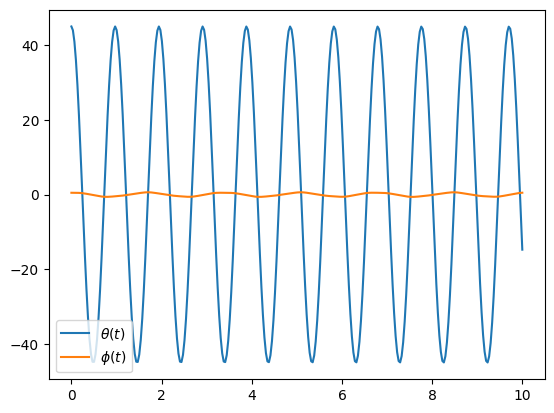

In [178]:
# The angles can be plotted to see how they change with respect to time given the initial conditions.

def plot():
    plt.figure()
    plt.plot(sys.times, np.rad2deg(x[:, :2]))
    plt.legend([sm.latex(s, mode='inline') for s in sys.coordinates])

plot()

## Chaotic Behavior¶

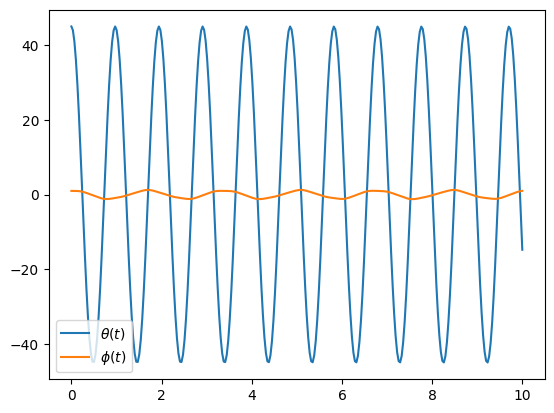

In [179]:
# Now change the intial condition of the plat angle just slighty to see if the behvior of the system is similar.

sys.initial_conditions[phi] = np.deg2rad(1.0)
x = sys.integrate()
plot()
# Seems all good, very similar behavior. But now set the rod angle to and try the same slight change in plate angle.



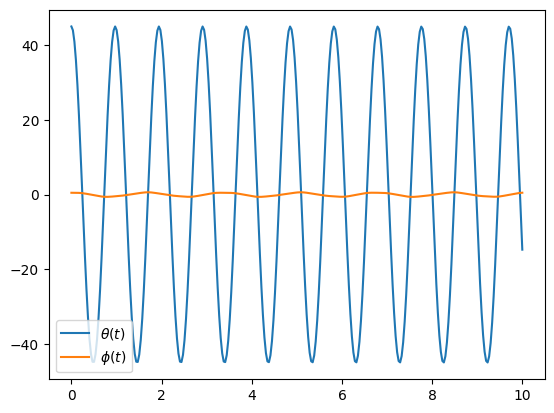

In [180]:
# sys.initial_conditions[theta] = np.deg2rad(90)
sys.initial_conditions[phi] = np.deg2rad(0.5)
x = sys.integrate()
plot()

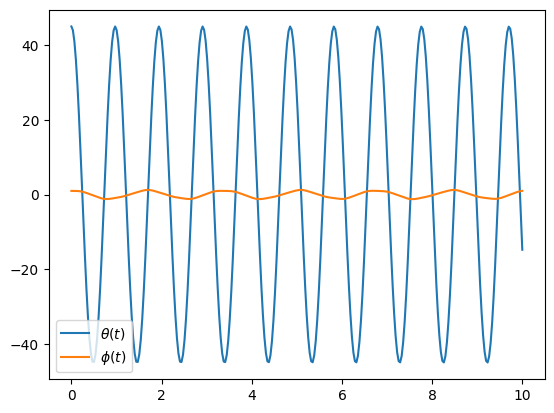

In [181]:
# First note that the plate behaves wildly. What happens when the initial plate angle is altered slightly.

sys.initial_conditions[phi] = np.deg2rad(1.0)
x = sys.integrate()
plot()
# The behavior does not look similar to the previous simulation. This is an example of chaotic behavior. The plate angle can not be reliably predicted because slight changes in the initial conditions cause the behavior of the system to vary widely.

## Visualization

In [183]:
# Finally, the system can be animated by attached a cylinder and a plane shape to the rigid bodies. To properly align the coordinate axes of the shapes with the bodies, simple rotations are used.

rod_shape = Cylinder(2 * lA, 0.005, color='red', name='rod')
plate_shape = Plane(w, h, color='blue', name='plate')

v1 = VisualizationFrame('rod',
                        A.orientnew('rod', 'Axis', (sm.pi / 2, A.x)),
                        Ao,
                        rod_shape)

v2 = VisualizationFrame('plate',
                        B.orientnew('plate', 'Body', (sm.pi / 2, sm.pi / 2, 0), 'XZX'),
                        Bo,
                        plate_shape)

scene = Scene(N, No, v1, v2, system=sys)

In [188]:
# The following method opens up a simple gui that shows a 3D animatoin of the system.
scene.display()  # Opens animation in your browser


/Users/yifanzhang/pydy-resources
Serving HTTP on 127.0.0.1 port 8000 ...
To view visualization, open:

http://localhost:8000/index.html?load=2025-07-20_17-24-01_scene_desc.json
Press Ctrl+C to stop server...


127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /index.html?load=2025-07-20_17-24-01_scene_desc.json HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /css/bootstrap.min.css HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /css/slider.css HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /css/main.css HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /css/codemirror/codemirror.css HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /css/codemirror/blackboard.css HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /js/external/jquery/jquery.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /js/external/jquery/jquery-ui.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /js/external/bootstrap/bootstrap.min.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /js/external/codemirror/codemirror.js HTTP/1.1" 200 -
127.0.0.1 - - [20/Jul/2025 17:24:01] "GET /js/external/codemirror/javascript-mode.js HTTP/1.1" 200 -
127.0.